# Exploring and processing Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [4]:
# Converting the frame into Array
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [7]:
# Extracting Features and Target
X = dataset[:, 0:10]
y = dataset[:, 10]

In [8]:
# Performing scaling to ensure uniform range for features (from 0 to 1)
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)

C:\Users\SARANG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
X_scaled

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
# Creating train,valid,test datasets
from sklearn.model_selection import train_test_split
X_train,X_val_test,y_train,y_val_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)
X_val,X_test,y_val,y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5, random_state = 1)

In [13]:
print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building the model

In [15]:
# Setting up the architecture
from keras.models import Sequential
from keras.layers import Dense

In [44]:
model_1 = Sequential([Dense(32, activation = 'relu', input_shape = (10,)),
                      Dense(32, activation = 'relu'),
                      Dense(1, activation = 'sigmoid')
                     ])


In [45]:
# Compile the model
model_1.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['accuracy'])

In [46]:
hist = model_1.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 683us/step - loss: 0.6857 - acc: 0.5949 - val_loss: 0.6807 - val_acc: 0.5890
Epoch 2/100
1022/1022 [==============================] - 0s 59us/step - loss: 0.6753 - acc: 0.6174 - val_loss: 0.6698 - val_acc: 0.6210
Epoch 3/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.6658 - acc: 0.6967 - val_loss: 0.6602 - val_acc: 0.7215
Epoch 4/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.6575 - acc: 0.7495 - val_loss: 0.6518 - val_acc: 0.7580
Epoch 5/100
1022/1022 [==============================] - 0s 49us/step - loss: 0.6498 - acc: 0.7593 - val_loss: 0.6439 - val_acc: 0.7763
Epoch 6/100
1022/1022 [==============================] - 0s 51us/step - loss: 0.6422 - acc: 0.7661 - val_loss: 0.6361 - val_acc: 0.7808
Epoch 7/100
1022/1022 [==============================] - 0s 51us/step - loss: 0.6349 - acc: 0.7671 - val_loss: 0.6285 - val_acc: 0.7854


1022/1022 [==============================] - 0s 67us/step - loss: 0.3334 - acc: 0.8708 - val_loss: 0.3162 - val_acc: 0.8676
Epoch 61/100
1022/1022 [==============================] - 0s 67us/step - loss: 0.3320 - acc: 0.8699 - val_loss: 0.3147 - val_acc: 0.8676
Epoch 62/100
1022/1022 [==============================] - 0s 58us/step - loss: 0.3300 - acc: 0.8718 - val_loss: 0.3133 - val_acc: 0.8676
Epoch 63/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.3286 - acc: 0.8748 - val_loss: 0.3122 - val_acc: 0.8676
Epoch 64/100
1022/1022 [==============================] - 0s 76us/step - loss: 0.3268 - acc: 0.8718 - val_loss: 0.3114 - val_acc: 0.8676
Epoch 65/100
1022/1022 [==============================] - 0s 75us/step - loss: 0.3259 - acc: 0.8679 - val_loss: 0.3097 - val_acc: 0.8676
Epoch 66/100
1022/1022 [==============================] - 0s 60us/step - loss: 0.3240 - acc: 0.8728 - val_loss: 0.3094 - val_acc: 0.8676
Epoch 67/100
1022/1022 [==============================

In [47]:
# Evaluate the model on test data

model_1.evaluate(X_test, y_test)[1]

219/219 [==============================] - 0s 41us/step


0.9086758018084312

# Visualizing the Loss and Accuracy

In [24]:
import matplotlib.pyplot as plt

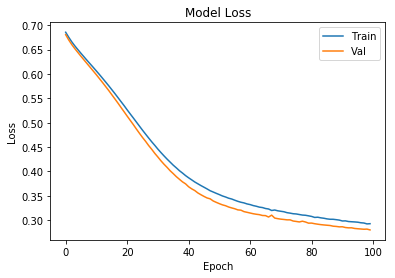

In [48]:
# Visualizing the loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

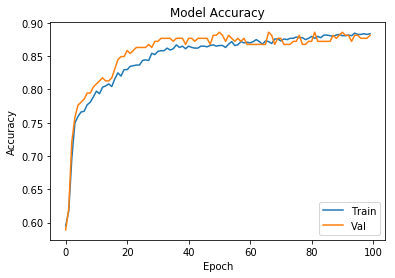

In [49]:
# Visualizing the Accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'], loc = 'lower right')
plt.show()

In [31]:
# Simulate the overfitting
model_2 = Sequential([(Dense(1000, activation = 'relu', input_shape = (10,))),
                       Dense(1000, activation = 'relu'),
                       Dense(1000, activation = 'relu'),
                       Dense(1000, activation = 'relu'),
                       Dense(1, activation = 'sigmoid')
                     ])

In [33]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
hist_2 = model_2.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4751 - acc: 0.7828 - val_loss: 0.3742 - val_acc: 0.8356
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3499 - acc: 0.8552 - val_loss: 0.3102 - val_acc: 0.8858
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3173 - acc: 0.8659 - val_loss: 0.3046 - val_acc: 0.8767
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2846 - acc: 0.8855 - val_loss: 0.3041 - val_acc: 0.8721
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2794 - acc: 0.8924 - val_loss: 0.2622 - val_acc: 0.9087
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2767 - acc: 0.8973 - val_loss: 0.2529 - val_acc: 0.8995
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2587 - acc: 0.8982 - val_loss: 0.2635 - val_acc: 0.8950
Epoch 8/

Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1551 - acc: 0.9354 - val_loss: 0.3047 - val_acc: 0.8904
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1368 - acc: 0.9374 - val_loss: 0.3117 - val_acc: 0.8904
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1468 - acc: 0.9276 - val_loss: 0.3501 - val_acc: 0.8767
Epoch 64/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1554 - acc: 0.9384 - val_loss: 0.2936 - val_acc: 0.8767
Epoch 65/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1585 - acc: 0.9384 - val_loss: 0.3267 - val_acc: 0.8630
Epoch 66/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1752 - acc: 0.9286 - val_loss: 0.2795 - val_acc: 0.8721
Epoch 67/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1588 - acc: 0.9354 - val_loss: 0.2748 - val_acc: 0.8858
Epoch 68/100
1022/1022 [========================

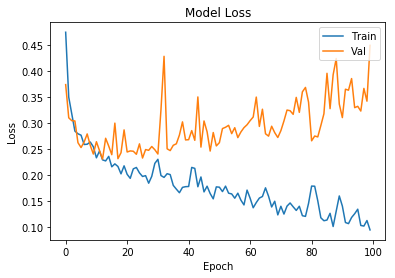

In [35]:
# Loss for overfitting 
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

In [ ]:
# Accuracy for overfitting
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'], loc = 'lower right')
plt.show()

In [36]:
# We see overfitting here
# Let's try to fix it using L2 regularization and Dropout.

from keras import regularizers
from keras.layers import Dropout

model_3 = Sequential([(Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01),input_shape = (10,))),
                       Dropout(0.3),
                       Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
                       Dropout(0.3),
                       Dense(1000, activation = 'relu',kernel_regularizer = regularizers.l2(0.01)),
                       Dropout(0.3),
                       Dense(1000, activation = 'relu',kernel_regularizer = regularizers.l2(0.01)),
                       Dropout(0.3),
                       Dense(1, activation = 'sigmoid',kernel_regularizer = regularizers.l2(0.01))
                     ])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [37]:
model_3.compile(optimizer='adam', loss= 'binary_crossentropy',metrics=['accuracy'])

In [38]:
hist_3= model_3.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=[X_val,y_val])

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 5s 5ms/step - loss: 14.7427 - acc: 0.6164 - val_loss: 4.0729 - val_acc: 0.6667
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 1.7436 - acc: 0.8200 - val_loss: 0.6982 - val_acc: 0.8356
Epoch 3/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.5592 - acc: 0.8728 - val_loss: 0.4929 - val_acc: 0.8721
Epoch 4/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.5006 - acc: 0.8708 - val_loss: 0.4593 - val_acc: 0.8904
Epoch 5/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.5026 - acc: 0.8562 - val_loss: 0.5251 - val_acc: 0.8493
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5016 - acc: 0.8718 - val_loss: 0.5130 - val_acc: 0.8493
Epoch 7/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.4941 - acc: 0.8689 - val_loss: 0.4567 - val_acc: 0.8721
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4478 - acc: 0.8767 - val_loss: 0.4188 - val_acc: 0.8767
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4573 - acc: 0.8679 - val_loss: 0.4088 - val_acc: 0.9041
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4671 - acc: 0.8718 - val_loss: 0.4191 - val_acc: 0.8995
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4462 - acc: 0.8806 - val_loss: 0.4080 - val_acc: 0.9041
Epoch 65/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4652 - acc: 0.8689 - val_loss: 0.4362 - val_acc: 0.8676
Epoch 66/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4696 - acc: 0.8718 - val_loss: 0.4303 - val_acc: 0.8767
Epoch 67/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4490 - acc: 0.8718 - val_loss: 0.4110 - val_acc: 0.8995
Epoch 68/100
1022/1022 [========================

In [43]:
# Loss after regularization
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(top = 1.2, bottom = 0)
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

NameError: name 'hist_3' is not defined

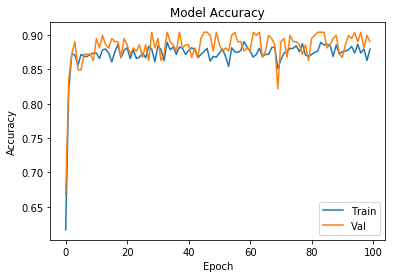

In [41]:
# Accuracy after regularization
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'], loc = 'lower right')
plt.show()